
# Introduction to Machine Learning

An interactive Machine Learning example written in Python, broken into the following sections:

1. [Scope](#scope)
  1. [Problem Definition](#scope-problem-definition)
  1. [Data](#scope-data)
1. [Prepare](#prepare)
  1. [Import](#prepare-import)
  1. [Train Test Split](#prepare-train-test-split)
  1. [Cleaning](#prepare-cleaning)
1. [Analyze](#analyze)
  1. [Pre-processing](#analyze-pre-processing)
  1. [Modeling](#analyze-modeling)
  1. [Hyper-parameter Tuning](#analyze-hyper-parameter-tuning)
1. [Reflect](#reflect)

<a id='scope'></a>

## Scope

<a id='scope-problem-definition'></a>

### Problem Definition

We seek to answer the following questions by applying Machine Learning techniques to the NYC Mayor's Office of Sustainability dataset on green buildings and energy efficiency:

1. Given a buidling's characteristics, can we predict what its energy usage intensity will be?
  - Could be useful for urban planners to proactively estimate energy consumption of various of living spaces.
1. Given a buidling's characteristics and energy use, can we predict what its Energy Star rating would be?
  - Could be useful for Energy Star to assist in assigning ratings to buildings without a score.
  - Could be useful for architects to predict the Energy Star scores of different designs.
1. What sources of energy cause the most greenhouse gas emissions for a property?
  - Could be useful for policy makers to see what sources of energy produce the most greenhouse gas emissions.
1. What factors lead to energy loss between the source of generation and the site of the property?
  - Could be useful for engineers to identify which locations, property usages, sources of energy, etc. lead to the most energy loss and adjust the energy grid accordingly.

<a id='scope-data'></a>

### Data

#### Citation

```
NYC Mayor's Office of Sustainability, Green Buildings & Energy Efficiency. (2017). [Data set]. 
    Retrieved from http://www.nyc.gov/html/gbee/html/plan/ll84_scores.shtml
```

#### Dimensions

| Column                                                     | Functional Data Type    | Technical Data Type |
|------------------------------------------------------------|-------------------------|---------------------|
| Order                                                      | index                   | integer             |
| Property Id                                                | identifier              | text                |
| Property Name                                              | identifier              | text                |
| Parent Property Id                                         | identifier              | text                |
| Parent Property Name                                       | identifier              | text                |
| BBL - 10 digits                                            | identifier              | text                |
| NYC Borough, Block and Lot (BBL) self-reported             | identifier              | text                |
| NYC Building Identification Number (BIN)                   | identifier              | text                |
| Address 1 (self-reported)                                  | location                | text                |
| Address 2                                                  | location                | text                |
| Postal Code                                                | location                | text                |
| Street Number                                              | location                | text                |
| Street Name                                                | location                | text                |
| Borough                                                    | location                | catagorical         |
| DOF Gross Floor Area                                       | building characteristic | numeric             |
| Primary Property Type - Self Selected                      | building characteristic | categorical         |
| List of All Property Use Types at Property                 | building characteristic | [categorical]       |
| Largest Property Use Type                                  | building characteristic | categorical         |
| Largest Property Use Type - Gross Floor Area (ft²)         | building characteristic | numeric             |
| 2nd Largest Property Use Type                              | building characteristic | categorical         |
| 2nd Largest Property Use - Gross Floor Area (ft²)          | building characteristic | numeric             |
| 3rd Largest Property Use Type                              | building characteristic | categorical         |
| 3rd Largest Property Use Type - Gross Floor Area (ft²)     | building characteristic | numeric             |
| Year Built                                                 | building characteristic | time                |
| Number of Buildings - Self-reported                        | building characteristic | integer             |
| Occupancy                                                  | building characteristic | percentage          |
| Metered Areas (Energy)                                     | building characteristic | categorical         |
| Metered Areas (Water)                                      | building characteristic | categorical         |
| ENERGY STAR Score                                          | score                   | numeric             |
| Site EUI (kBtu/ft²)                                        | energy usage            | numeric             |
| Weather Normalized Site EUI (kBtu/ft²)                     | energy usage            | numeric             |
| Weather Normalized Site Electricity Intensity (kWh/ft²)    | energy usage            | numeric             |
| Weather Normalized Site Natural Gas Intensity (therms/ft²) | energy usage            | numeric             |
| Weather Normalized Source EUI (kBtu/ft²)                   | energy usage            | numeric             |
| Fuel Oil #1 Use (kBtu)                                     | energy usage            | numeric             |
| Fuel Oil #2 Use (kBtu)                                     | energy usage            | numeric             |
| Fuel Oil #4 Use (kBtu)                                     | energy usage            | numeric             |
| Fuel Oil #5 &amp; 6 Use (kBtu)                             | energy usage            | numeric             |
| Diesel #2 Use (kBtu)                                       | energy usage            | numeric             |
| District Steam Use (kBtu)                                  | energy usage            | numeric             |
| Natural Gas Use (kBtu)                                     | energy usage            | numeric             |
| Weather Normalized Site Natural Gas Use (therms)           | energy usage            | numeric             |
| Electricity Use - Grid Purchase (kBtu)                     | energy usage            | numeric             |
| Weather Normalized Site Electricity (kWh)                  | energy usage            | numeric             |
| Total GHG Emissions (Metric Tons CO2e)                     | environmental footprint | numeric             |
| Direct GHG Emissions (Metric Tons CO2e)                    | environmental footprint | numeric             |
| Indirect GHG Emissions (Metric Tons CO2e)                  | environmental footprint | numeric             |
| Property GFA - Self-Reported (ft²)                         | building characteristic | numeric             |
| Water Use (All Water Sources) (kgal)                       | resource usage          | numeric             |
| Water Intensity (All Water Sources) (gal/ft²)              | resource usage          | numeric             |
| Source EUI (kBtu/ft²)                                      | energy usage            | numeric             |
| Release Date                                               | metadata                | time                |
| Water Required?                                            | building characteristic | categorical         |
| DOF Benchmarking Submission Status                         | metadata                | categorical         |

<a id='prepare'></a>

## Prepare

<a id='prepare-import'></a>

### Import

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import the data
data_path = os.path.join(os.path.abspath('..'), 'data', 'nyc_benchmarking_disclosure_data_reported_in_2017.xlsx')
df = pd.read_excel(data_path, sheet_name='Information and Metrics')

In [3]:
# View the structure of the data
df.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,...,Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,...,6962.2,0,6962.2,762051,Not Available,Not Available,619.4,2017-05-01 17:32:03,No,In Compliance
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,...,55870.4,51016.4,4854.1,3889181,Not Available,Not Available,404.3,2017-04-27 11:23:27,No,In Compliance
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,...,0,0,0,231342,Not Available,Not Available,Not Available,2017-04-27 11:23:27,No,In Compliance
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,...,0,0,0,1305748,Not Available,Not Available,Not Available,2017-04-27 11:23:27,No,In Compliance
4,5,4778288,Neuro Institute,28400,NYP Columbia (West Campus),1021390085,1-02139-0085,1063403,710 West 168th Street,Not Available,...,0,0,0,179694,Not Available,Not Available,Not Available,2017-04-27 11:23:27,No,In Compliance


<a id='prepare-train-test-split'></a>

### Train Test Split

In [4]:
# Hold out a portion of the data for testing
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.25)

# Furthermore, hold out a portion of the training set for validation
df_train, df_valid = train_test_split(df_train, test_size=0.25)

# Print the shape of each
print(df_train.shape)
print(df_valid.shape)
print(df_test.shape)

(6606, 54)
(2203, 54)
(2937, 54)


<a id='prepare-cleaning'></a>

### Cleaning

#### Column Types

In [5]:
# We will define each cleaning step as a function,
# so that we can apply the same rules to our validation and test sets
def clean_missing_value_text(df, text):
    return df.replace(text, np.NaN)

In [6]:
def clean_col_types(df):
    return df.astype(dtype={'Order': 'int64',
                            'Property Id': 'object',
                            'Property Name': 'object',
                            'Parent Property Id': 'object',
                            'Parent Property Name': 'object',
                            'BBL - 10 digits': 'object',
                            'NYC Borough, Block and Lot (BBL) self-reported': 'object',
                            'NYC Building Identification Number (BIN)': 'object',
                            'Address 1 (self-reported)': 'object',
                            'Address 2': 'object',
                            'Postal Code': 'object',
                            'Street Number': 'object',
                            'Street Name': 'object',
                            'Borough': 'category',
                            'DOF Gross Floor Area': 'float64',
                            'Primary Property Type - Self Selected': 'category',
                            'List of All Property Use Types at Property': 'object',
                            'Largest Property Use Type': 'category',
                            'Largest Property Use Type - Gross Floor Area (ft²)': 'float64',
                            '2nd Largest Property Use Type': 'category',
                            '2nd Largest Property Use - Gross Floor Area (ft²)': 'float64',
                            '3rd Largest Property Use Type': 'category',
                            '3rd Largest Property Use Type - Gross Floor Area (ft²)': 'float64',
                            'Year Built': 'datetime64[ns]',
                            'Number of Buildings - Self-reported': 'int64',
                            'Occupancy': 'float64',
                            'Metered Areas (Energy)': 'category',
                            'Metered Areas  (Water)': 'category',
                            'ENERGY STAR Score': 'float64',
                            'Site EUI (kBtu/ft²)': 'float64',
                            'Weather Normalized Site EUI (kBtu/ft²)': 'float64',
                            'Weather Normalized Site Electricity Intensity (kWh/ft²)': 'float64',
                            'Weather Normalized Site Natural Gas Intensity (therms/ft²)': 'float64',
                            'Weather Normalized Source EUI (kBtu/ft²)': 'float64',
                            'Fuel Oil #1 Use (kBtu)': 'float64',
                            'Fuel Oil #2 Use (kBtu)': 'float64',
                            'Fuel Oil #4 Use (kBtu)': 'float64',
                            'Fuel Oil #5 & 6 Use (kBtu)': 'float64',
                            'Diesel #2 Use (kBtu)': 'float64',
                            'District Steam Use (kBtu)': 'float64',
                            'Natural Gas Use (kBtu)': 'float64',
                            'Weather Normalized Site Natural Gas Use (therms)': 'float64',
                            'Electricity Use - Grid Purchase (kBtu)': 'float64',
                            'Weather Normalized Site Electricity (kWh)': 'float64',
                            'Total GHG Emissions (Metric Tons CO2e)': 'float64',
                            'Direct GHG Emissions (Metric Tons CO2e)': 'float64',
                            'Indirect GHG Emissions (Metric Tons CO2e)': 'float64',
                            'Property GFA - Self-Reported (ft²)': 'float64',
                            'Water Use (All Water Sources) (kgal)': 'float64',
                            'Water Intensity (All Water Sources) (gal/ft²)': 'float64',
                            'Source EUI (kBtu/ft²)': 'float64',
                            'Release Date': 'datetime64[ns]',
                            'Water Required?': 'category',
                            'DOF Benchmarking Submission Status': 'category'})

In [7]:
# Notice above that missing values are actually listed as 'Not Available'
# We cannot set columns to a numeric data type correctly when they contain the 'Not Available' text
# Instead, we can replace each 'Not Available' with NaN, which is widely recognized by Python libraries
df_train = clean_missing_value_text(df_train, text='Not Available')

# See what the column types are now
# Will want to change these based on the dimensions table above
print()
print('Data types - before cleaning')
print('----------------------------')
df_train.info()

# Clean the column types
df_train = clean_col_types(df_train)

# Confirm that the types were changed
print()
print('Data types - after cleaning')
print('---------------------------')
df_train.info()


Data types - before cleaning
----------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6606 entries, 3187 to 5379
Data columns (total 54 columns):
Order                                                         6606 non-null int64
Property Id                                                   6606 non-null int64
Property Name                                                 6606 non-null object
Parent Property Id                                            6606 non-null object
Parent Property Name                                          6606 non-null object
BBL - 10 digits                                               6606 non-null object
NYC Borough, Block and Lot (BBL) self-reported                6602 non-null object
NYC Building Identification Number (BIN)                      6512 non-null object
Address 1 (self-reported)                                     6606 non-null object
Address 2                                                     118 non-null object
Post

#### Missing Values

In [8]:
# Function to calculate the percent of missing values for each column in a data frame
def calc_percent_nan_col(df):
    return df.isna().sum(axis=0)/df.shape[0] * 100

In [9]:
# Function to calculate the percent of missing values for each row in a data frame
def calc_percent_nan_row(df):
    return df.isna().sum(axis=1)/df.shape[1] * 100

In [10]:
# Function to pretty print pandas objects in percent format (like 100.00%)
def pprint_percent(pd_obj):
    
    # Format percents like 100.00%
    original_format = pd.options.display.float_format
    pd.options.display.float_format = '{:.2f}%'.format
    
    # Print
    print()
    print(pd_obj)
    print()
    
    # Reset the pandas formatter
    pd.options.display.float_format = original_format

In [11]:
# Function to remove columns and rows that have over a certain percent missing values
def clean_missing_values(df, col_perc=33, row_perc=33):

    # Remove all columns that have more than 33% missing values
    df = df.loc[:, calc_percent_nan_col(df) < col_perc]
    
    # Remove all rows that have more than 33% missing values
    df = df.loc[calc_percent_nan_row(df) < row_perc, :]
    
    return df


Percent NaNs in each column - before cleaning
---------------------------------------------

Order                                                         0.00%
Property Id                                                   0.00%
Property Name                                                 0.00%
Parent Property Id                                            0.00%
Parent Property Name                                          0.00%
BBL - 10 digits                                               0.00%
NYC Borough, Block and Lot (BBL) self-reported                0.06%
NYC Building Identification Number (BIN)                      1.42%
Address 1 (self-reported)                                     0.00%
Address 2                                                    98.21%
Postal Code                                                   0.00%
Street Number                                                 0.98%
Street Name                                                   0.97%
Borough               

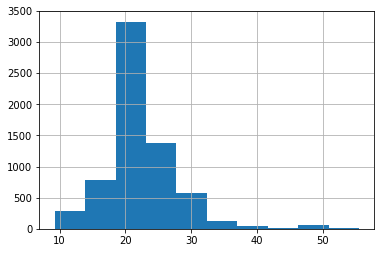


Percent NaNs in each column - after cleaning
--------------------------------------------

Order                                                         0.00%
Property Id                                                   0.00%
Property Name                                                 0.00%
Parent Property Id                                            0.00%
Parent Property Name                                          0.00%
BBL - 10 digits                                               0.00%
NYC Borough, Block and Lot (BBL) self-reported                0.06%
NYC Building Identification Number (BIN)                      1.43%
Address 1 (self-reported)                                     0.00%
Postal Code                                                   0.00%
Street Number                                                 0.90%
Street Name                                                   0.88%
Borough                                                       0.87%
DOF Gross Floor Area    

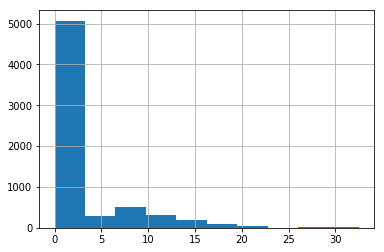

In [12]:
# See what percent of each column in the training set is missing values
print()
print('Percent NaNs in each column - before cleaning')
print('---------------------------------------------')
pprint_percent(calc_percent_nan_col(df_train))

# See what percent of each row in the training set is missing values
hist = calc_percent_nan_row(df_train).hist()
print()
print('Percent NaNs in each row - before cleaning')
print('------------------------------------------')
plt.show()

# Clean
df_train = clean_missing_values(df_train)

# See what percent of each column in the training set is missing values, after cleaning
print()
print('Percent NaNs in each column - after cleaning')
print('--------------------------------------------')
pprint_percent(calc_percent_nan_col(df_train))

# See what percent of each row in the training set is missing values, after cleaning
print()
print('Percent NaNs in each row - after cleaning')
print('-----------------------------------------')
hist = calc_percent_nan_row(df_train).hist()
plt.show()


#### Outliers

In [13]:
# https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm
def clean_outliers(df, lower_quantile=0.25, upper_quantile=0.75, lower_multiplier=3, upper_multiplier=3):
    
    # Inner quartile
    q1 = df.quantile(lower_quantile)
    q3 = df.quantile(upper_quantile)
    iq = q3 - q1

    # Lower bound
    lb = q1 - lower_multiplier * iq

    # Upper bound
    ub = q3 + upper_multiplier * iq

    # Remove the outliers
    for col in lb.index:
        
        # Keep NaNs
        df = df.loc[(df[col] >= lb[col]) | df[col].isna(), :] # Remove lower-bound outliers
        df = df.loc[(df[col] <= ub[col]) | df[col].isna(), :] # Remove upper-bound outliers
    return df


Histograms - before cleaning
----------------------------


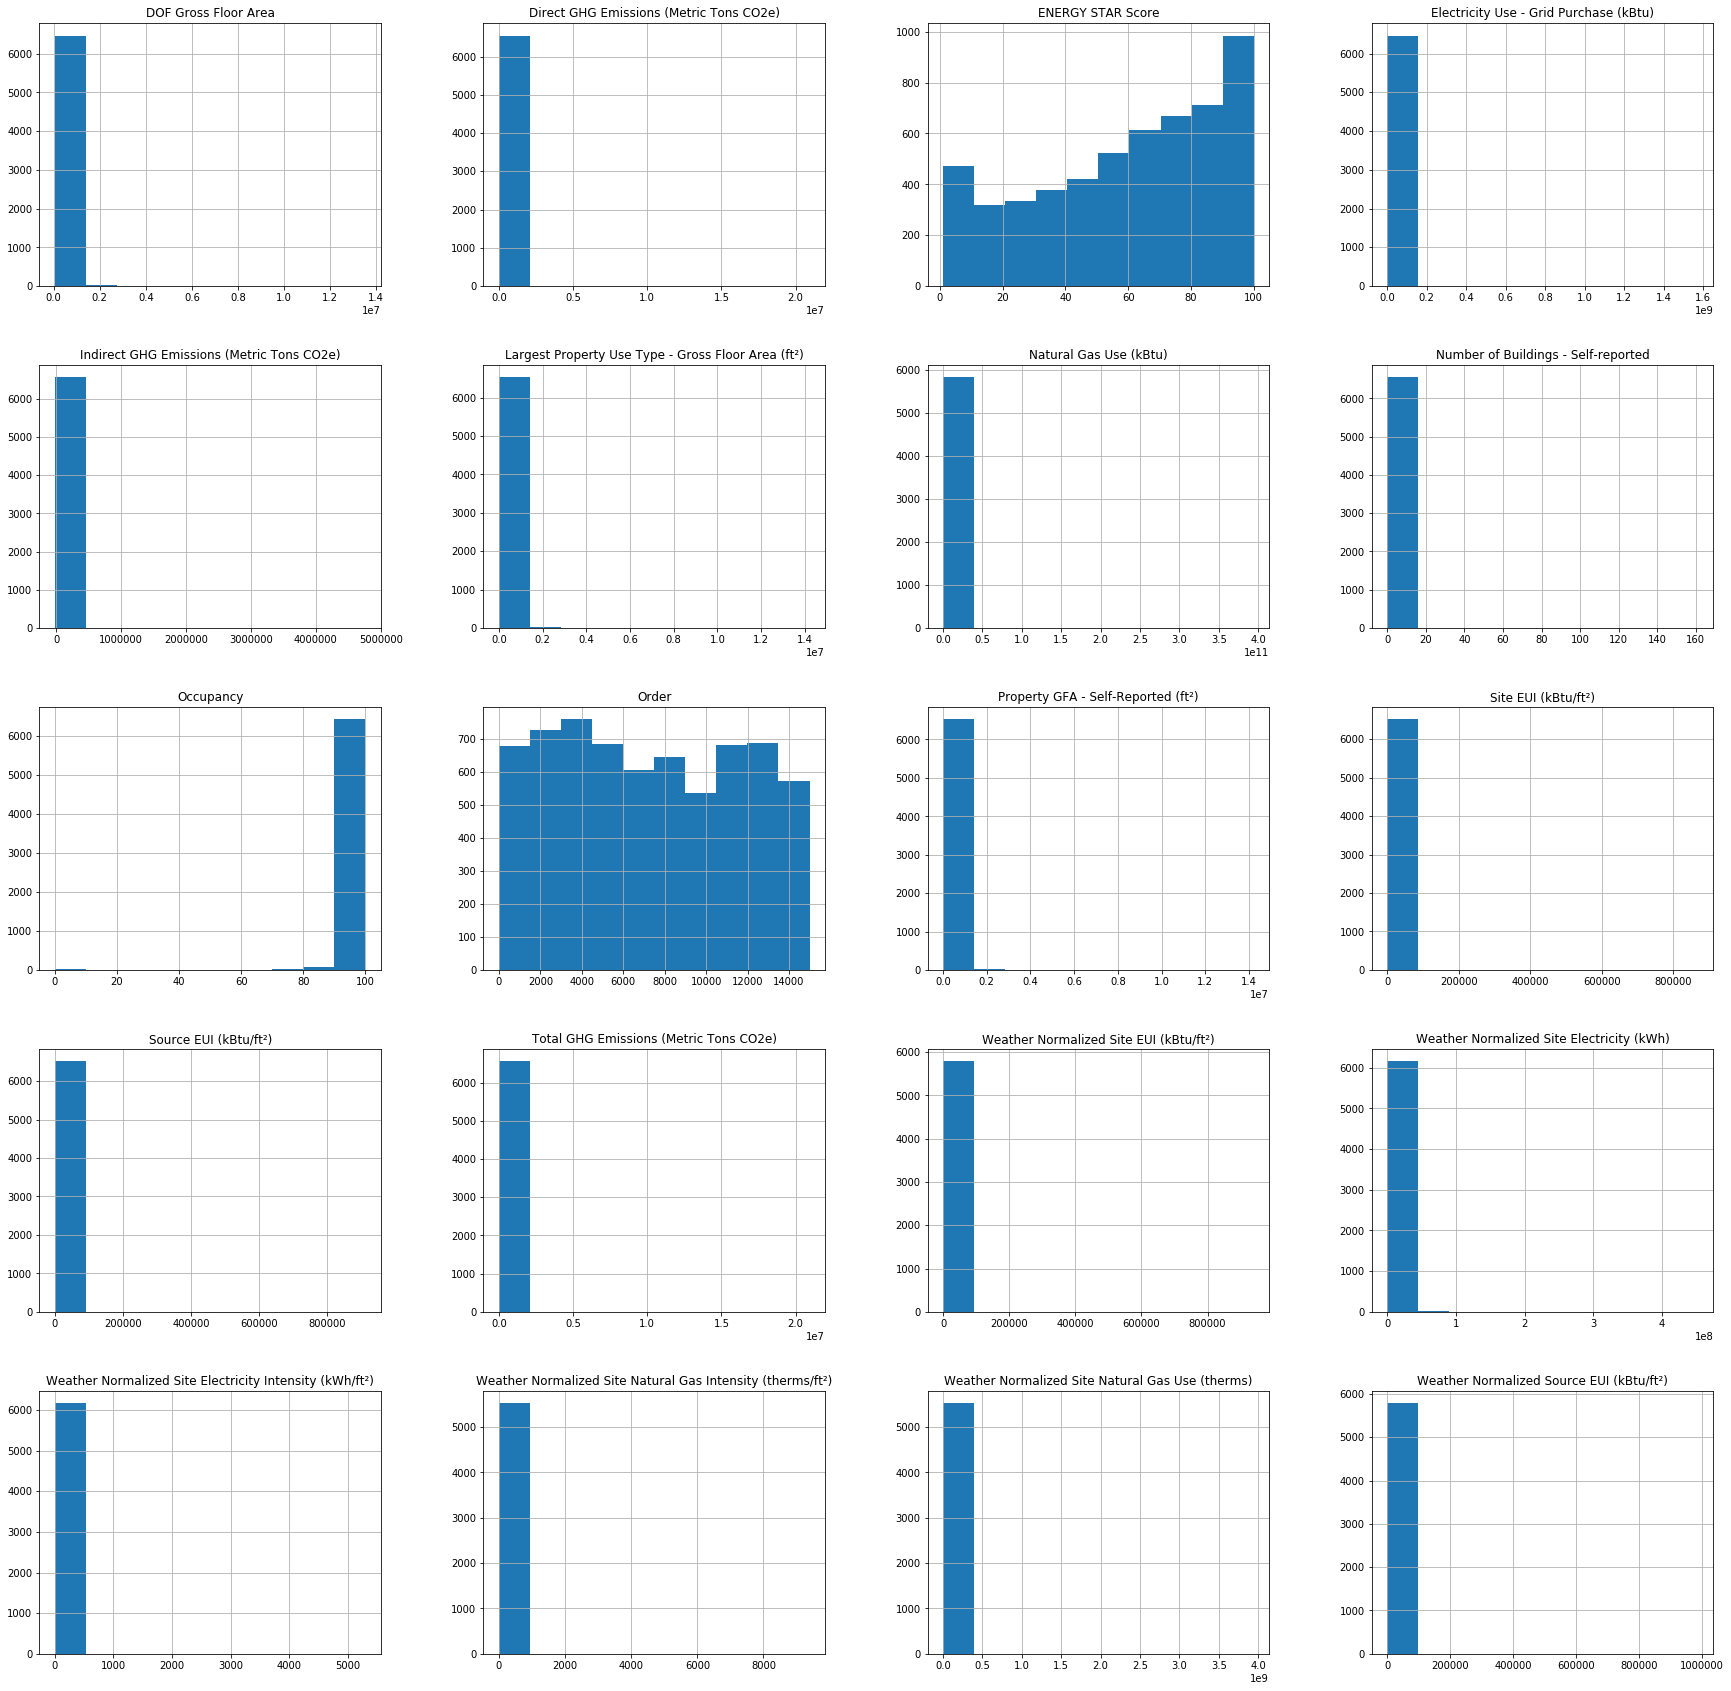


Histograms - after cleaning
---------------------------


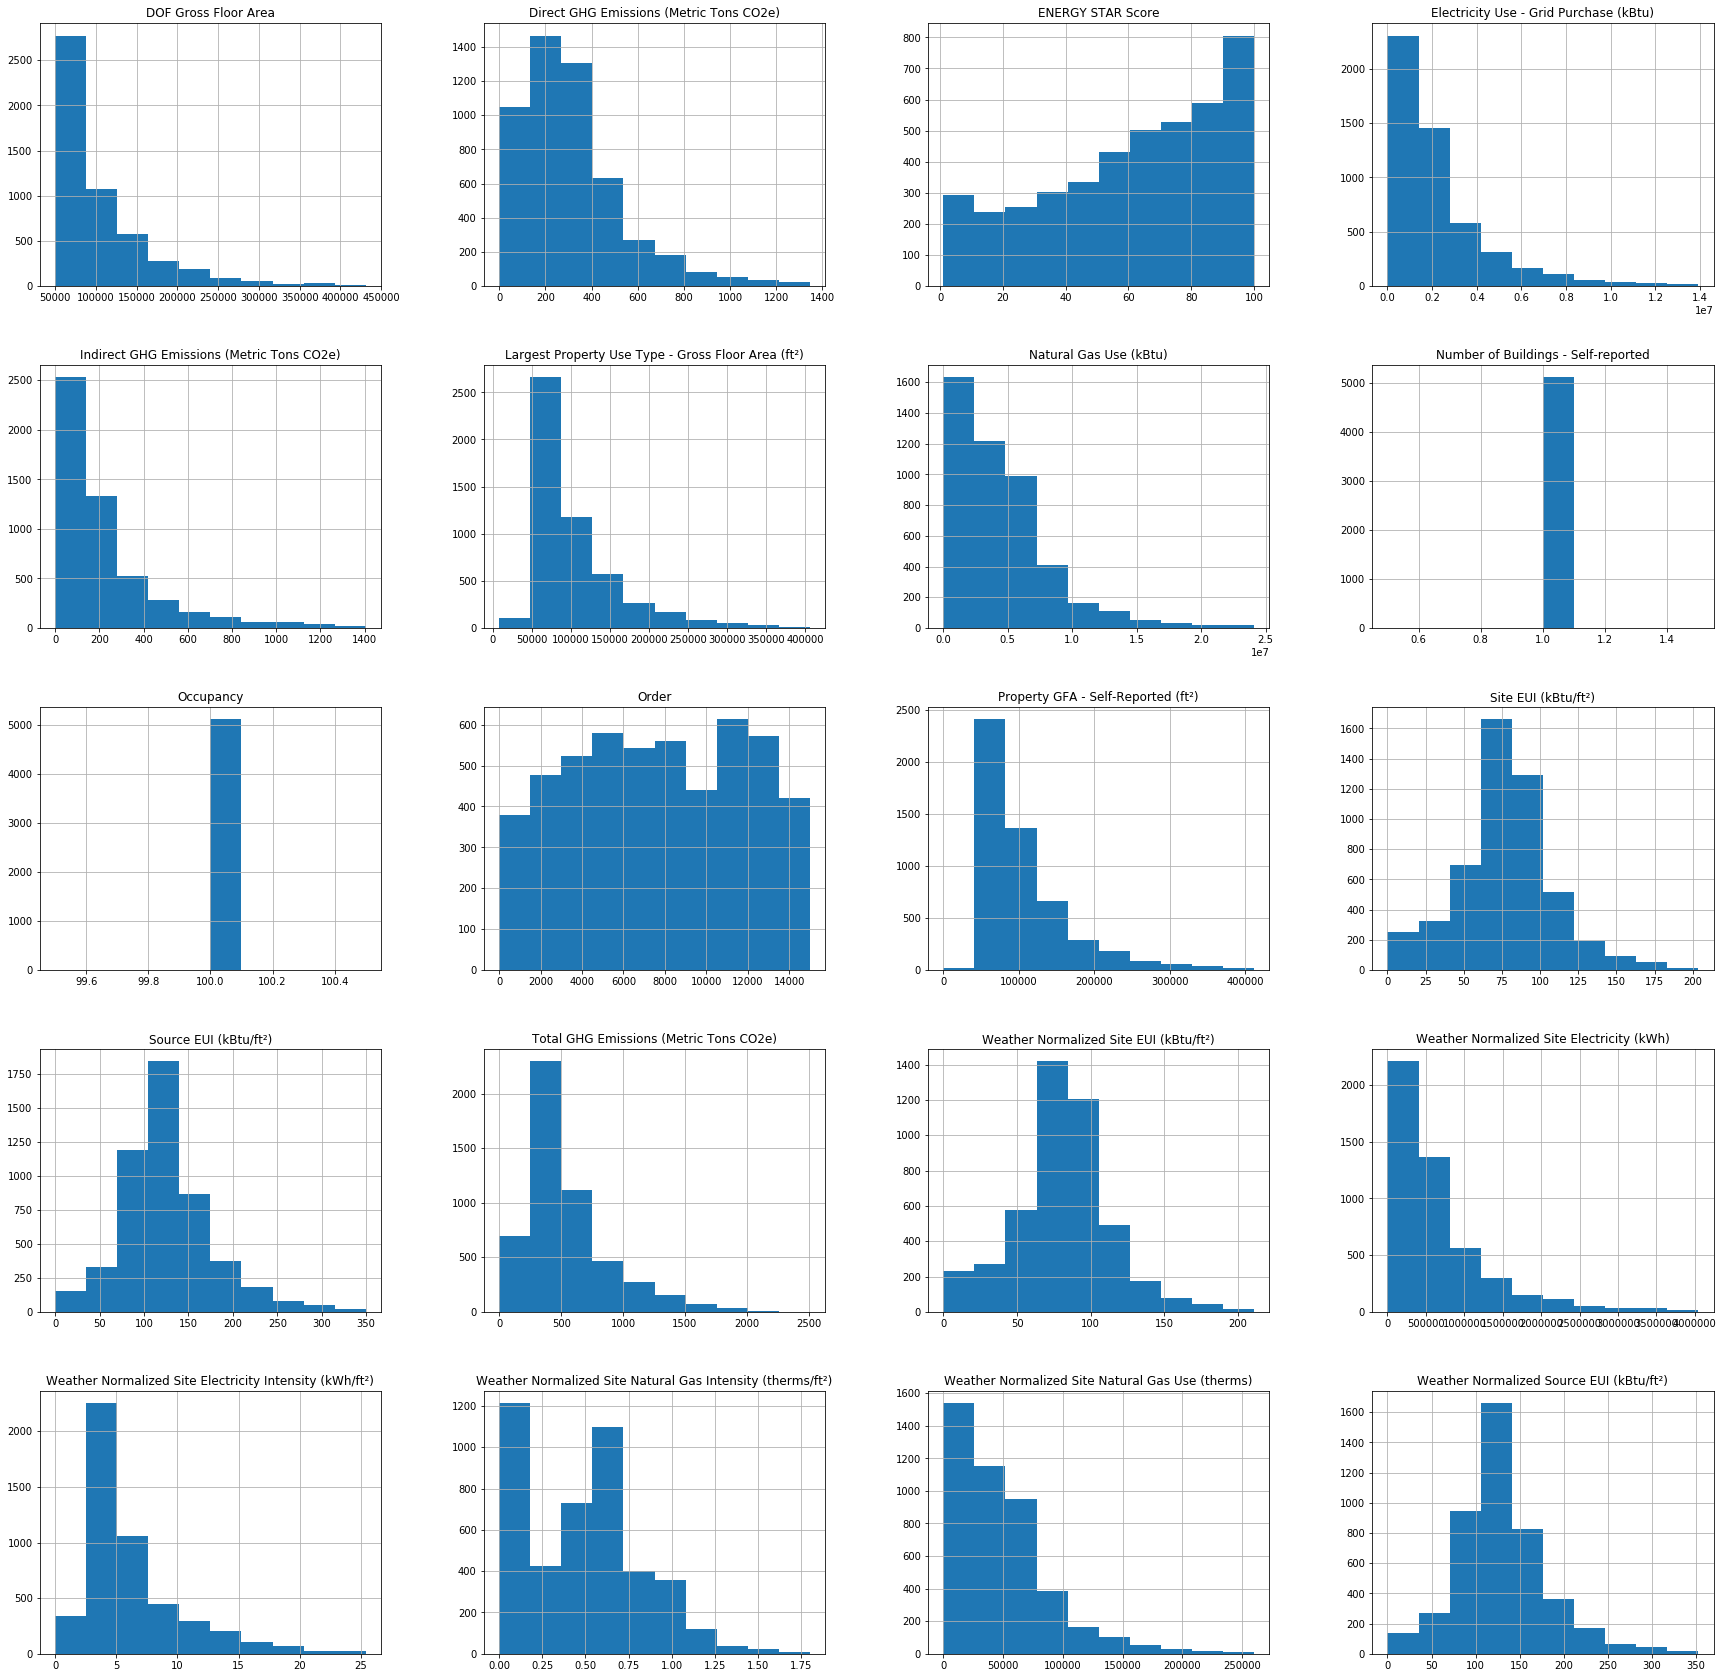

In [14]:
# Check the distributions of numeric columns before cleaning outliers
# Note the large domain
print()
print('Histograms - before cleaning')
print('----------------------------')
hist = df_train.hist(figsize=(30, 30))
plt.show()

# Remove outliers
df_train = clean_outliers(df_train)

# Now we have cleaner numeric columns
print()
print('Histograms - after cleaning')
print('---------------------------')
hist = df_train.hist(figsize=(30, 30))
plt.show()

#### Imputation

In [40]:
def pre_process_impute(df):
    
    # It does not make sense to impute plain text (object) types,
    # as plain text does not have a finite number of instances
    perc_nan_col = calc_percent_nan_col(df.select_dtypes(exclude=['object']))

    # For each column that has missing values, impute them using median or mode
    for col_name in perc_nan_col[perc_nan_col > 0].index:
        
        # Get the data type of the column
        dtype = df.dtypes[col_name]
        
        # Get the column itself
        col = df.loc[:, col_name]
        
        # If numeric, use the median
        if dtype == 'int64' or dtype == 'float64':
            col.fillna(col.median(), inplace=True)
            
        # Else, use the mode
        else:
            col.fillna(col.mode(), inplace=True)
    
    # Return the df
    return df

In [41]:
# Percent missing values before imputation
print()
print('Percent NaNs in each column - before pre-processing')
print('---------------------------------------------------')
pprint_percent(calc_percent_nan_col(df_train))

# Impute using median (for numeric columns) and mode (for all others)
pre_process_impute(df_train)

# Percent missing values after imputation
# Note that free-text columns still contain missing values,
# as it does not make sense to impute plain text (object) types
print()
print('Percent NaNs in each column - after pre-processing')
print('--------------------------------------------------')
pprint_percent(calc_percent_nan_col(df_train))

Order                                                         0.000000
Property Id                                                   0.000000
Property Name                                                 0.000000
Parent Property Id                                            0.000000
Parent Property Name                                          0.000000
BBL - 10 digits                                               0.000000
NYC Borough, Block and Lot (BBL) self-reported                0.000000
NYC Building Identification Number (BIN)                      1.173939
Address 1 (self-reported)                                     0.000000
Postal Code                                                   0.000000
Street Number                                                 0.254353
Street Name                                                   0.234788
Borough                                                       0.234788
DOF Gross Floor Area                                          0.000000
Primar

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

In [16]:
def bin_column(df, col, n_bins):
    df

In [17]:
# For each column that has missing values
# Train a KNN classifier using the subset without NaNs
# And use it to classify the missing values
def pre_process_knn_impute(df, n_neighbors=3, weights='distance', n_bins=33):

    # Only select the subset of columns that are not objects,
    # As it does not make sense to impute text values
    df = df.select_dtypes(exclude=['object'])
    
    # For each column that has missing values
    perc_nan_col = calc_percent_nan_col(df)
    for col in perc_nan_col[perc_nan_col > 0].index:
        
        # Train using the subset where the target column is not missing
        train =  
        test = 
        cond_1 =  df.loc[:, df.columns == col].isna().any(axis=1)
        cond_2 = -df.loc[:, df.columns != col].isna().any(axis=1)
#         knn_nans = df.loc[cond_1 & cond_2, :]
    
    
    

SyntaxError: invalid syntax (<ipython-input-17-f74bf286c921>, line 7)

In [ ]:
# For each column that has missing values
# Train a KNN classifier using the subset without NaNs
# And use it to classify the missing values
def pre_process_knn_impute(df, n_neighbors=3, weights='distance', n_bins=33):
    
    # Each column that has missing values
    perc_nan_col = calc_percent_nan_col(df)
    print(perc_nan_col)
    
    
    # Imputation doesn't really help with text objects
    # TODO need to deal with text
    # TODO need to bucket 
    # TODO should probably take out the cols without the target
    df = df.loc[:, (df.dtypes != 'object').values]
    df = df.loc[:, (df.dtypes != 'category').values]
    df = df.loc[:, (df.dtypes != '<M8[ns]').values]
    
    print(df)


    # Bin float64
    for col in df.dtypes[df.dtypes == 'float64'].index:
        print("rjigej>", col)
        df[col] = pd.cut(df[col], bins=n_bins)
    
    # The classifier
    knn_classifier = KNeighborsClassifier(n_neighbors, weights=weights)
    
    # Map for storing the models
    knn_models = {}
    
    # Map for storing the label encoder
    encoders = {}
    
    for col in perc_nan_col[perc_nan_col > 0].index:
        
        # 
        print(col)
        
        # We will train a KNN classifier using the data with no missing values.
        # Therefore, select the subset without any NaNs.
        knn_train = df.loc[-df.isna().any(axis=1), :]
        
        # Train the model
        knn_model = knn_classifier.fit(knn_train.loc[:, knn_train.columns != col], 
                                       knn_train.loc[:, knn_train.columns == col])
        
        # Store the model
        knn_models[col] = knn_model
        
    print(knn_models)

        
#         # We will impute the missing values in the current column using data from the other columns.
#         # However, the data from the other columns must not be missing. 
        
#         # Therefore, select the subset with NaNs in the current column (condition 1),
#         # but with no NaNs in the other columns (condition 2)
#         cond_1 =  df.loc[:, df.columns == col].isna().any(axis=1)
#         cond_2 = -df.loc[:, df.columns != col].isna().any(axis=1)
#         knn_nans = df.loc[cond_1 & cond_2, :]
        
     

#         # Impute the missing values
#         knn_imputed = knn_model.predict(knn_nans.loc[:, knn_nans.columns != col])
#         print(knn_imputed)        

In [19]:
col = 'Order'
# df_train[col].dtypes
# # df_train.loc[:, df_train.dtypes != 'object']
# df_train.isna().any(axis=1)
# for col in df.dtypes[df.dtypes == 'float64'].index:
#     print(col)
#     print('a')
#     print(df[col])
#     print('b')
#     print(pd.cut(df[col], bins=33))

# df.loc[:, df.dtypes[df.dtypes != 'object']]
# print(len(df_train.columns))
# # print(df_train.dtypes[df_train.dtypes != 'object'].index)
# print(len((df_train.dtypes != 'object').values))
# # pd.cut(df_train[col], bins=33)
# df = df_train
# (df.dtypes == 'object') | 
df = df_train
df.select_dtypes(exclude=['object'])


,Order,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),...,Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status
8718,10941,Brooklyn,91800.0,Multifamily Housing,Multifamily Housing,87990.0,1970-01-01 00:00:00.000001928,1,100.0,Whole Building,...,1218893.4,344546.9,429.0,315.8,113.1,87990.0,114.5,2017-04-25 17:40:13,Yes,In Compliance
4820,5581,Manhattan,57148.0,Multifamily Housing,Multifamily Housing,60552.0,1970-01-01 00:00:00.000001920,1,100.0,Whole Building,...,981227.4,287581.3,516.0,424.9,91.1,60552.0,146.0,2017-04-12 14:54:58,Yes,In Compliance
4515,5190,Manhattan,228017.0,Office,Office,198829.0,1970-01-01 00:00:00.000001974,1,100.0,Whole Building,...,10574994.2,3099353.1,981.4,0.0,981.4,214629.0,154.7,2017-05-11 15:22:16,No,In Compliance
9322,11666,Brooklyn,114548.0,Multifamily Housing,Multifamily Housing,114548.0,1970-01-01 00:00:00.000001962,1,100.0,Whole Building,...,2139037.7,611730.8,545.4,346.9,198.5,114548.0,117.3,2017-04-11 13:04:23,Yes,In Compliance
3754,4315,Manhattan,246320.0,Multifamily Housing,Multifamily Housing,258636.0,1970-01-01 00:00:00.000001968,1,100.0,Whole Building,...,7129715.2,2046545.2,1871.3,1209.7,661.6,258636.0,178.1,2017-04-28 17:06:59,No,In Compliance
7820,9609,Brooklyn,55627.0,K-12 School,K-12 School,55627.0,1970-01-01 00:00:00.000001891,1,100.0,Whole Building,...,2366502.6,693582.2,307.5,87.9,219.6,55627.0,164.8,2017-05-02 11:11:09,Yes,In Compliance
8271,10418,Brooklyn,98880.0,Multifamily Housing,Multifamily Housing,115360.0,1970-01-01 00:00:00.000001965,1,100.0,Whole Building,...,1220681.1,339757.6,442.8,329.5,113.3,115360.0,89.7,2017-05-01 22:14:15,Yes,In Compliance
4182,4786,Manhattan,78874.0,Multifamily Housing,Multifamily Housing,62740.0,1970-01-01 00:00:00.000001987,1,100.0,Whole Building,...,2520903.6,712938.8,484.4,250.4,233.9,68664.0,187.4,2017-05-01 14:58:14,Yes,In Compliance
7204,8713,Bronx,111000.0,Multifamily Housing,Multifamily Housing,111015.0,1970-01-01 00:00:00.000001958,1,100.0,Whole Building,...,1608409.5,448227.2,664.6,515.3,149.3,111015.0,109.5,2017-03-23 10:35:55,Yes,In Compliance
10238,12870,Queens,239442.0,Multifamily Housing,Multifamily Housing,252744.0,1970-01-01 00:00:00.000001962,1,100.0,Whole Building,...,4719669.0,1351160.9,1055.5,617.5,438.0,252744.0,106.1,2017-04-28 18:19:42,No,In Compliance


In [ ]:
# pre_process_knn_impute(df_train)
# perc_nan_col = calc_percent_nan_col(df_train)
# print(perc_nan_col)

# perc_nan_col[perc_nan_col > 0].index
# # perc_nan_col.loc[perc_nan_col]
# # for col in perc_nan_col.loc[:
    

<a id='analyze'></a>

## Analyze

<a id='analyze-pre-processing'></a>

### Pre-processing
Imputation (move from above)
Normalization (both 0-1 and normal dist)
Feature engineering
Feature selection
Colinear features (PCA)


<a id='analyze-modeling'></a>

### Modeling

<a id='analyze-hyper-parameter-tuning'></a>

### Hyper-parameter Tuning

<a id='reflect'></a>

## Reflect